## Imbalanced

Imbalance data refers to a situation in which the classes within the dataset are not represented equally.

**Is a classification problem that affects the target variable.**


#### Loading and preparing the data

In [54]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

In [3]:
titanic = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/titanic_train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


- Check for anomalies

In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Upon checking the number of null values, we are going to drop the column **Cabin** and also dropping rows where **Age** is null.

In [5]:
titanic.drop(columns="Cabin", inplace = True)
titanic.dropna(inplace=True)

In [6]:
titanic.shape

(712, 11)

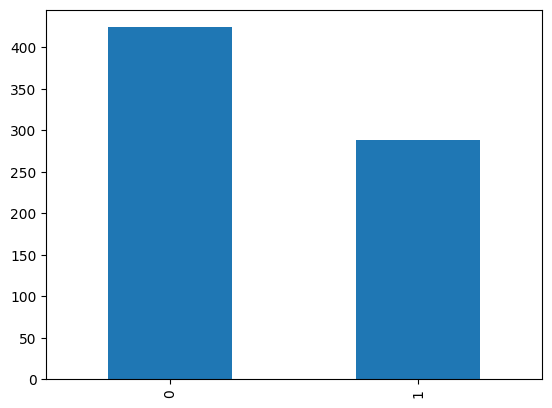

In [7]:
survived = titanic["Survived"].value_counts()
survived.plot(kind="bar")
plt.show()

- Preparing the data before modeling

In [8]:
titanic.drop(columns=["Name", "Ticket", "PassengerId"], inplace = True)

In [18]:
titanic["Sex"] = titanic["Sex"].replace({"male":0,
                                         "female":1})

In [22]:
titanic = pd.get_dummies(titanic, columns=["Embarked"])

In [23]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


For baseline, we will train a Logistic Regression in imbalanced data.

In [24]:
features = titanic.drop(columns = ["Survived"])
target = titanic["Survived"]

X_train, X_test, y_train, y_test = train_test_split(features, target)

In [44]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
log_reg = LogisticRegression()

In [34]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [35]:
log_reg.score(X_test_scaled, y_test)

0.7696629213483146

In [36]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       104
           1       0.76      0.65      0.70        74

    accuracy                           0.77       178
   macro avg       0.77      0.75      0.76       178
weighted avg       0.77      0.77      0.77       178



#### Oversampling

In [60]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)


In [61]:
train["Survived"] = y_train.values

In [62]:
survived = train[train["Survived"] == 1]
no_survived = train[train["Survived"] == 0]

In [63]:
yes_diabetes_oversampled = resample(survived, 
                                    replace=True, 
                                    n_samples = len(no_survived),
                                    random_state=0)

In [64]:
train_over = pd.concat([yes_diabetes_oversampled, no_survived])
train_over

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
437,-1.490689,-0.752318,3.529103,-0.554163,-0.516969,-0.102390,-0.477060,-0.207289,0.541275,1
139,0.914229,1.329225,0.111963,-0.554163,-0.516969,-0.477992,-0.477060,-0.207289,0.541275,1
310,-1.490689,-0.752318,0.530388,0.510309,0.609812,0.295016,-0.477060,-0.207289,0.541275,1
492,0.914229,-0.752318,-2.020612,-0.554163,0.609812,-0.480927,2.096173,-0.207289,-1.847491,1
190,-1.490689,-0.752318,-1.282788,0.510309,1.736592,1.483415,-0.477060,-0.207289,0.541275,1
...,...,...,...,...,...,...,...,...,...,...
523,0.914229,1.329225,-1.422264,2.639252,1.736592,-0.139392,-0.477060,-0.207289,0.541275,0
528,0.914229,-0.752318,-1.282788,-0.554163,-0.516969,-0.299955,2.096173,-0.207289,-1.847491,0
529,-0.288230,-0.752318,0.879076,0.510309,-0.516969,-0.155250,-0.477060,-0.207289,0.541275,0
531,-0.288230,-0.752318,0.460651,-0.554163,-0.516969,-0.445981,-0.477060,-0.207289,0.541275,0


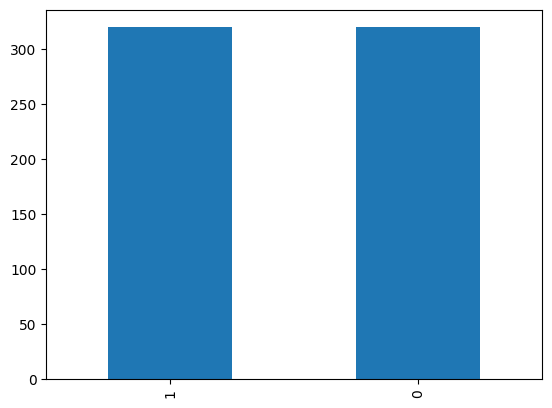

In [65]:
survived_plt = train_over["Survived"].value_counts()
survived_plt.plot(kind="bar")
plt.show()

- Now, with balanced data, we will create a new instance of Logistic Regression.

In [67]:
X_train_over = train_over.drop(columns = ["Survived"])
y_train_over = train_over["Survived"]

In [68]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [69]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       104
           1       0.70      0.69      0.69        74

    accuracy                           0.75       178
   macro avg       0.74      0.74      0.74       178
weighted avg       0.75      0.75      0.75       178



c:\Users\frede\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
